In [170]:
import pandas as pd
import random

random.seed(14477830)

df = pd.read_csv('musicData.csv')

Data Cleaning for Movie Title

In [171]:
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


## Data Cleaning

Check tempo

In [172]:
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce')
df['tempo'].isna().sum()

4985

Replace nan with median value

In [173]:
df['tempo'] = df['tempo'].fillna(df['tempo'].median())
df['tempo'].isna().sum()

0

Check duration. Cannnot drop them since it is a lot of data

In [174]:
duration = (df['duration_ms'] == -1).sum()
duration

4939

Swap -1 data with the median, to avoid affected by outliers.

In [175]:
duration_median = df[df["duration_ms"] > 0]['duration_ms'].median()

df['duration_ms'] = df['duration_ms'].replace(-1, duration_median)
duration = (df['duration_ms'] == -1).sum()
duration

0

Drop the obtained day column

In [176]:
df = df.drop('obtained_date', axis=1)

Conver mode to binary

In [177]:
df['mode'] = df['mode'].replace({'Major': 1, 'Minor': 0})

In [178]:
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,227360.0,0.941,0.79200,A#,0.115,-5.201,0.0,0.0748,100.889,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,0.0,0.0300,115.002,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,1.0,0.0345,127.994,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,1.0,0.2390,128.014,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,1.0,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,227360.0,0.574,0.00000,C#,0.119,-7.022,1.0,0.2980,98.028,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,1.0,0.0550,122.043,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,1.0,0.1460,131.079,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,0.0,0.0441,75.886,0.354,Hip-Hop


Convert key

In [179]:
# Apply one-hot encoding to the 'key' column
key_encoded = pd.get_dummies(df['key'], prefix='Key')

# Combine the new binary columns with the original dataset
df = df.join(key_encoded)

In [180]:
df = df.drop('key', axis=1)
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,...,Key_B,Key_C,Key_C#,Key_D,Key_D#,Key_E,Key_F,Key_F#,Key_G,Key_G#
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,227360.0,0.941,0.79200,0.115,...,False,False,False,False,False,False,False,False,False,False
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,...,False,False,False,True,False,False,False,False,False,False
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,...,False,False,False,False,False,False,False,False,False,True
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,...,False,False,True,False,False,False,False,False,False,False
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,227360.0,0.574,0.00000,0.119,...,False,False,True,False,False,False,False,False,False,False
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,0.109,...,True,False,False,False,False,False,False,False,False,False
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,0.143,...,False,False,False,True,False,False,False,False,False,False
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,0.106,...,False,False,False,False,False,False,False,False,True,False


In [181]:
df = df.drop(["instance_id", "artist_name", "track_name"], axis=1)

In [182]:
df.isna().sum()

popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               0
valence             5
music_genre         5
Key_A               0
Key_A#              0
Key_B               0
Key_C               0
Key_C#              0
Key_D               0
Key_D#              0
Key_E               0
Key_F               0
Key_F#              0
Key_G               0
Key_G#              0
dtype: int64

In [183]:
df.dropna(inplace=True)
#df.to_csv('musicDataCleaned.csv', index=False)

# Modeling

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier

In [185]:
import pandas as pd
df1 = pd.read_csv('musicDataCleaned.csv')
df1.isna().sum()

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
Key_A               0
Key_A#              0
Key_B               0
Key_C               0
Key_C#              0
Key_D               0
Key_D#              0
Key_E               0
Key_F               0
Key_F#              0
Key_G               0
Key_G#              0
dtype: int64

In [186]:
df1

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,Key_B,Key_C,Key_C#,Key_D,Key_D#,Key_E,Key_F,Key_F#,Key_G,Key_G#
0,27.0,0.00468,0.652,227360.0,0.941,0.79200,0.115,-5.201,0.0,0.0748,...,False,False,False,False,False,False,False,False,False,False
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0,0.0300,...,False,False,False,True,False,False,False,False,False,False
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,1.0,0.0345,...,False,False,False,False,False,False,False,False,False,True
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,1.0,0.2390,...,False,False,True,False,False,False,False,False,False,False
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,1.0,0.0413,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,59.0,0.03340,0.913,227360.0,0.574,0.00000,0.119,-7.022,1.0,0.2980,...,False,False,True,False,False,False,False,False,False,False
49996,72.0,0.15700,0.709,251860.0,0.362,0.00000,0.109,-9.814,1.0,0.0550,...,True,False,False,False,False,False,False,False,False,False
49997,51.0,0.00597,0.693,189483.0,0.763,0.00000,0.143,-5.443,1.0,0.1460,...,False,False,False,True,False,False,False,False,False,False
49998,65.0,0.08310,0.782,262773.0,0.472,0.00000,0.106,-5.016,0.0,0.0441,...,False,False,False,False,False,False,False,False,True,False


In [187]:
df1["music_genre"].value_counts()

music_genre
Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: count, dtype: int64


Dimension reduction

In [188]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

# Reinitialize the DataFrames
test_data = pd.DataFrame()
initial_train_data = pd.DataFrame()

unique_genres = df1['music_genre'].unique()

# Sample 500 for test set from each genre
for genre in unique_genres:
    genre_d = df1[df1['music_genre'] == genre]
    test_genre_data = genre_d.sample(n=500, random_state=14477830)
    remaining_data = genre_d.drop(test_genre_data.index)
    test_data = pd.concat([test_data, test_genre_data])
    initial_train_data = pd.concat([initial_train_data, remaining_data])


# Now split initial training data to create a validation set (5000 from training)
train_data, val_data = train_test_split(initial_train_data, test_size=5000, random_state=14477830, stratify=initial_train_data['music_genre'])

# Separating features and targets for train, test, and validation
x_train = train_data.drop('music_genre', axis=1)
y_train = train_data['music_genre']
x_test = test_data.drop('music_genre', axis=1)
y_test = test_data['music_genre']
x_val = val_data.drop('music_genre', axis=1)
y_val = val_data['music_genre']

In [189]:
train_freq = pd.Series(y_train).value_counts()
test_freq = pd.Series(y_test).value_counts()
val_freq = pd.Series(y_val).value_counts()

print("Frequency of target variable in y_train:")
print(train_freq)

print("\nFrequency of target variable in y_test:")
print(test_freq)

print("\nFrequency of target variable in y_val:")
print(val_freq)

Frequency of target variable in y_train:
music_genre
Blues          4000
Classical      4000
Electronic     4000
Jazz           4000
Hip-Hop        4000
Rap            4000
Alternative    4000
Anime          4000
Country        4000
Rock           4000
Name: count, dtype: int64

Frequency of target variable in y_test:
music_genre
Electronic     500
Anime          500
Jazz           500
Alternative    500
Country        500
Rap            500
Blues          500
Rock           500
Classical      500
Hip-Hop        500
Name: count, dtype: int64

Frequency of target variable in y_val:
music_genre
Electronic     500
Hip-Hop        500
Rock           500
Alternative    500
Anime          500
Blues          500
Country        500
Jazz           500
Classical      500
Rap            500
Name: count, dtype: int64


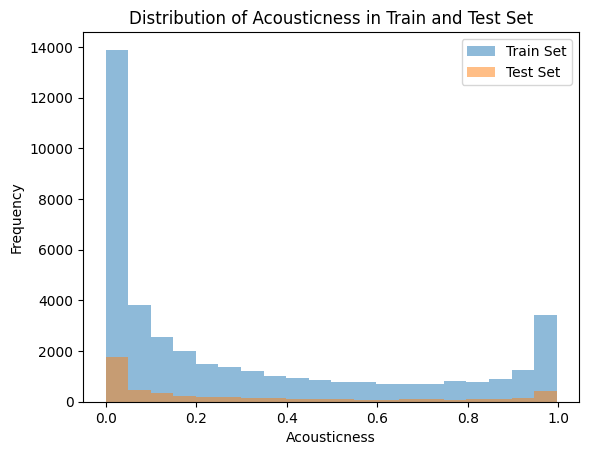

In [190]:
import matplotlib.pyplot as plt

# Plot the distribution of 'acousticness' in the train set
plt.hist(train_data['acousticness'], bins=20, alpha=0.5, label='Train Set')

# Plot the distribution of 'acousticness' in the test set
plt.hist(test_data['acousticness'], bins=20, alpha=0.5, label='Test Set')

# Add labels and title to the plot
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.title('Distribution of Acousticness in Train and Test Set')

plt.legend()
plt.show()


In [191]:
df[['Key_A', 'Key_A#', 'Key_B', 'Key_C', 'Key_C#', 'Key_D', 'Key_D#', 'Key_E', 'Key_F', 'Key_F#', 'Key_G', 'Key_G#']] = df[['Key_A', 'Key_A#', 'Key_B', 'Key_C', 'Key_C#', 'Key_D', 'Key_D#', 'Key_E', 'Key_F', 'Key_F#', 'Key_G', 'Key_G#']].astype(int)

In [192]:
# Standardize the features
scaler = StandardScaler()

categorical_features = ['mode', 'Key_A', 'Key_A#', 'Key_B', 'Key_C', 'Key_C#', 'Key_D', 'Key_D#', 'Key_E', 'Key_F', 'Key_F#', 'Key_G', 'Key_G#']

# Select the numerical features to be scaled, not normalizing the 'mode' feature
numerical_features = [col for col in x_train.columns if col not in categorical_features]

# Scale the numerical features
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()
x_val_scaled = x_val.copy()

x_train_scaled[numerical_features] = scaler.fit_transform(x_train[numerical_features])
x_test_scaled[numerical_features] = scaler.transform(x_test[numerical_features])
x_val_scaled[numerical_features] = scaler.transform(x_val[numerical_features])

# Apply PCA to the scaled features
pca = PCA(n_components=0.9)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)
x_val_pca = pca.transform(x_val_scaled)
x_train_scaled

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,Key_B,Key_C,Key_C#,Key_D,Key_D#,Key_E,Key_F,Key_F#,Key_G,Key_G#
31964,-0.141377,0.454692,0.765027,-0.155252,-1.044327,0.264536,0.277871,-0.273851,1.0,-0.497203,...,False,False,False,False,False,False,False,False,False,True
34050,-1.170466,-0.894667,-0.171156,-0.155252,1.207425,-0.558550,1.031050,0.437259,1.0,1.882352,...,False,False,False,False,False,False,True,False,False,False
42076,-0.591604,-0.578364,-1.505356,0.179629,-0.616683,-0.558395,-0.481481,0.093368,1.0,-0.619687,...,False,False,False,False,False,False,False,False,True,False
2600,-1.106148,-0.894933,0.137168,-0.471543,1.093891,-0.557899,1.191563,0.849830,1.0,-0.503129,...,False,False,False,True,False,False,False,False,False,False
11781,-0.591604,0.290808,0.512762,0.654821,0.355922,-0.530847,-0.742624,0.323716,1.0,-0.272977,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9007,-1.492056,-0.882838,-0.776591,0.537371,1.184718,-0.557720,0.790280,0.975118,0.0,-0.020106,...,False,False,False,False,False,False,False,True,False,False
29007,1.337938,-0.393994,0.367009,-0.250831,0.469456,-0.558550,1.784229,0.382608,1.0,2.810862,...,False,False,True,False,False,False,False,False,False,False
47624,1.273619,-0.563732,0.529580,-0.369382,0.685170,-0.558540,-0.475307,0.305771,0.0,-0.268038,...,False,False,False,False,False,False,True,False,False,False
47787,1.659528,-0.113050,0.843509,-0.227878,-1.267610,-0.558550,0.284045,-1.397859,0.0,0.914330,...,False,False,True,False,False,False,False,False,False,False


In [193]:
n_components_kept = pca.n_components_
print(f"Number of Principal Components Kept: {n_components_kept}")

Number of Principal Components Kept: 11


In [194]:
# Count the number of components with eigenvalues > 1
num_components = len(pca.explained_variance_[pca.explained_variance_ > 1])

# Calculate the total variance explained by these components
variance_explained = sum(pca.explained_variance_ratio_[pca.explained_variance_ > 1])

print(f"Number of components with eigenvalues > 1: {num_components}")
print(f"Total variance explained by these components: {variance_explained}")


Number of components with eigenvalues > 1: 3
Total variance explained by these components: 0.5026862763926075


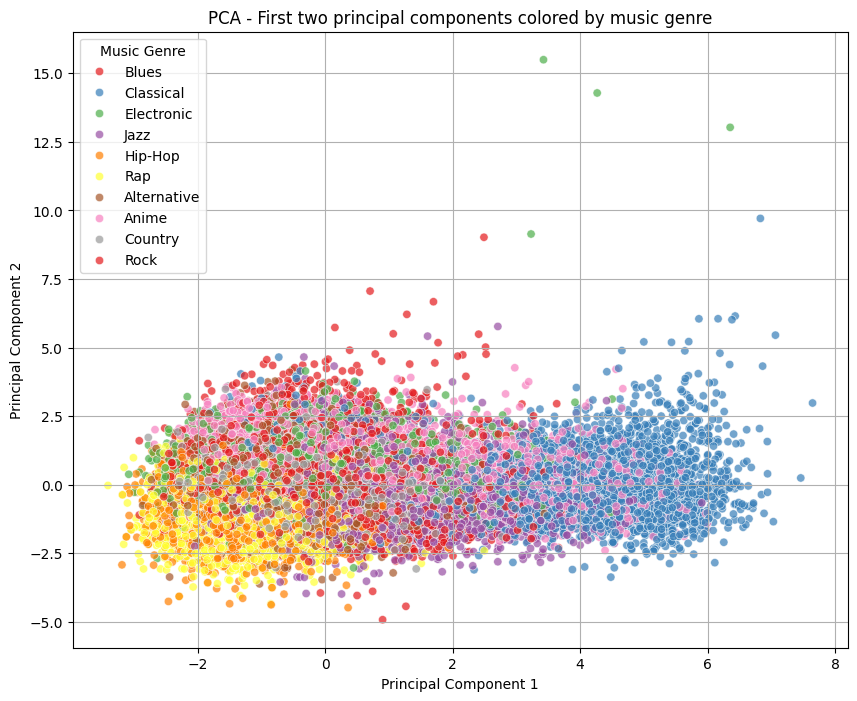

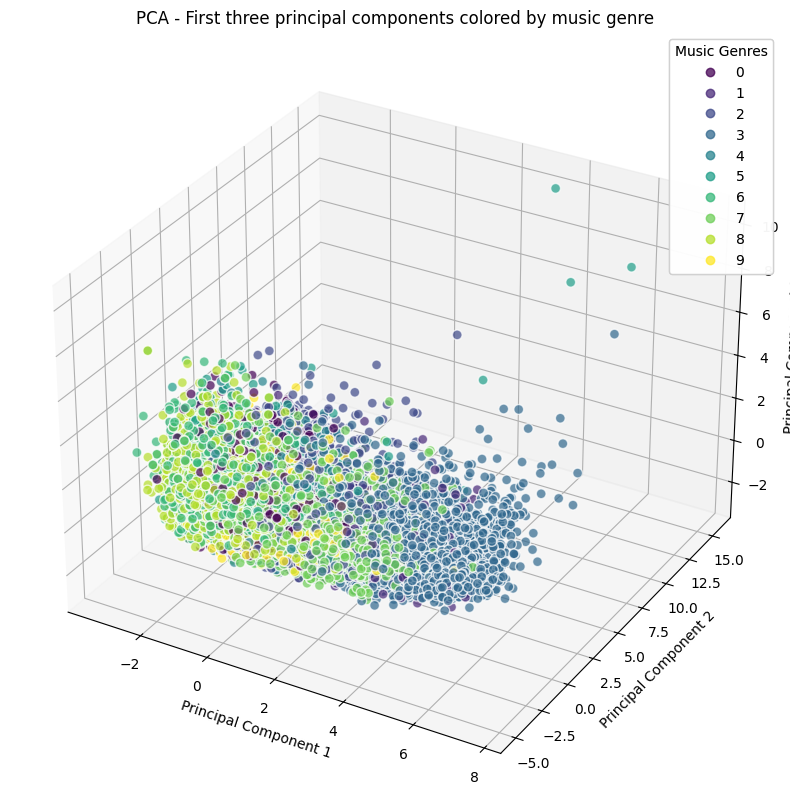


Explained variance by component:
[0.30457414 0.11101398 0.08709815 0.08069757 0.07805725 0.06762007
 0.06035852 0.04920069 0.03790789 0.0212696  0.01928395]


In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pca_df = pd.DataFrame(data=x_train_pca, columns=['PC' + str(i) for i in range(1, 12)])
pca_df['music_genre'] = y_train.values

# Visualizing the clusters in the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='music_genre', data=pca_df, palette='Set1', alpha=0.7)
plt.title('PCA - First two principal components colored by music genre')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Music Genre')
plt.grid(True)
plt.show()

from mpl_toolkits.mplot3d import Axes3D

# Visualizing the clusters in the first three principal components
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
                     c=pd.Categorical(pca_df['music_genre']).codes, 
                     cmap='viridis', alpha=0.7, edgecolors='w', s=50)

# Title and labels
ax.set_title('PCA - First three principal components colored by music genre')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend = ax.legend(*scatter.legend_elements(), title="Music Genres", loc='upper right')
ax.add_artist(legend)

plt.show()
# Explaining the variance by each component
print("\nExplained variance by component:")
print(pca.explained_variance_ratio_)

In [196]:
# Accessing the PCA components
components = pca.components_

# Get the feature names from the original dataset
feature_names = x_train.columns

# Create a DataFrame for easier analysis of loadings per component
components_df = pd.DataFrame(components, columns=feature_names, index=[f"Component {i+1}" for i in range(components.shape[0])])

# Analyze the first two components
first_two_components = components_df.iloc[0:2].T
print(first_two_components)

# Finding the features with the highest loadings for each of the first two components
top_features_comp1 = first_two_components.nlargest(n=5, columns='Component 1')
top_features_comp2 = first_two_components.nlargest(n=5, columns='Component 2')

print("Top contributing features for the first principal component:")
print(top_features_comp1.index.tolist())

print("Top contributing features for the second principal component:")
print(top_features_comp2.index.tolist())

                  Component 1  Component 2
popularity          -0.251353    -0.377837
acousticness         0.423078    -0.227646
danceability        -0.303622    -0.453234
duration_ms          0.123863     0.344498
energy              -0.437770     0.320537
instrumentalness     0.337980     0.116162
liveness            -0.083708     0.330389
loudness            -0.457530     0.184080
mode                 0.002106     0.015121
speechiness         -0.174183    -0.282175
tempo               -0.146702     0.352611
valence             -0.275408    -0.131628
Key_A                0.001542     0.002954
Key_A#               0.001358    -0.007336
Key_B               -0.008002    -0.001510
Key_C                0.006340     0.005659
Key_C#              -0.011772    -0.013553
Key_D                0.002685     0.008630
Key_D#               0.006373    -0.001287
Key_E                0.002702     0.007083
Key_F                0.004645     0.000160
Key_F#              -0.005153    -0.002272
Key_G      

# Clustering to get new Label

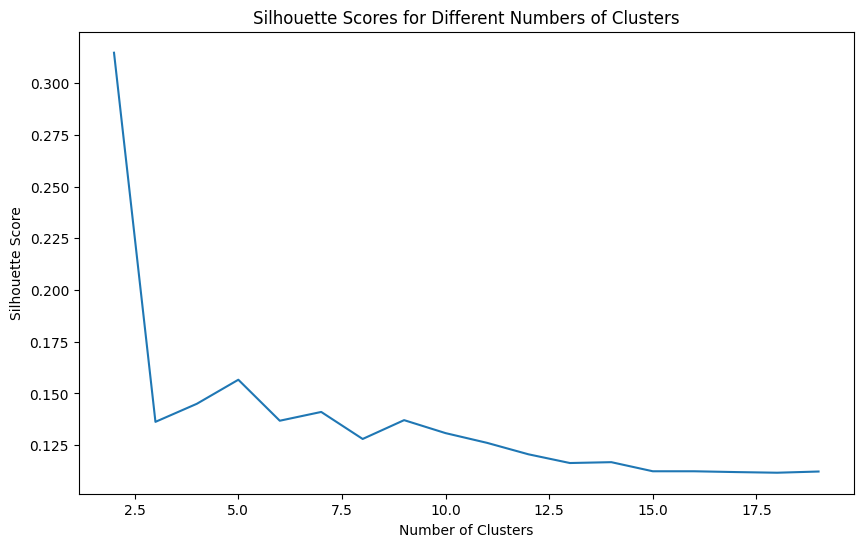

In [197]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the range of clusters to test
cluster_range = range(2, 20)

# Initialize a list to store the silhouette scores
silhouette_scores = []

# Apply K-means clustering across the cluster range and calculate silhouette scores
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=14477830)
    cluster_labels = kmeans.fit_predict(x_train_pca)
    silhouette_avg = silhouette_score(x_train_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores to find the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores)
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [198]:
optimal_num_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal Number of Clusters: {optimal_num_clusters}")

Optimal Number of Clusters: 2


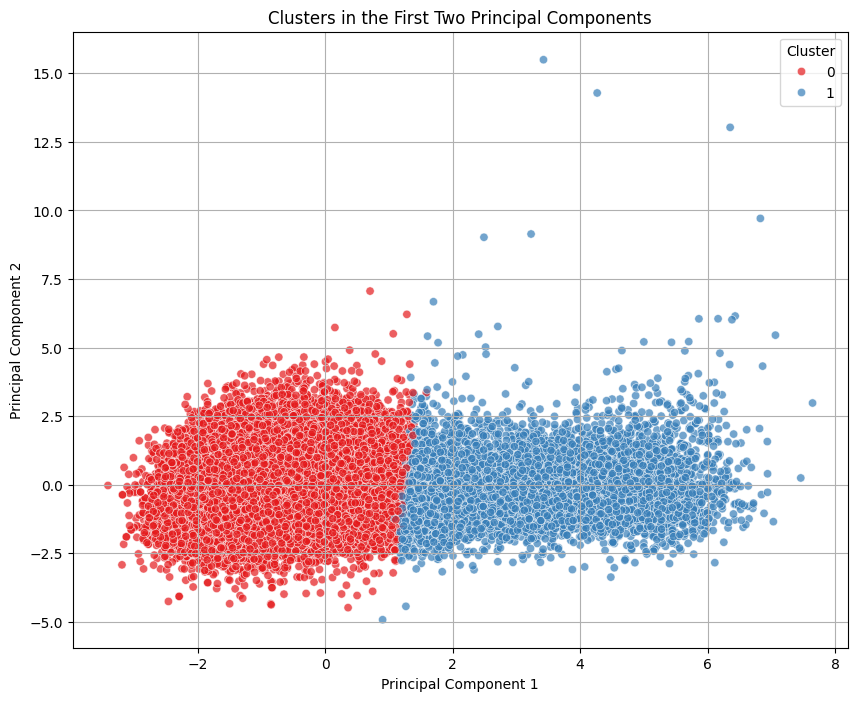

In [199]:
# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=14477830)
cluster_labels = kmeans.fit_predict(x_train_pca)

# Create a DataFrame with the PCA components and cluster labels
pca_df_clusters = pd.DataFrame(data=x_train_pca, columns=['PC' + str(i) for i in range(1, 12)])
pca_df_clusters['Cluster'] = cluster_labels

# Visualize the clusters in the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df_clusters, palette='Set1', alpha=0.7)
plt.title('Clusters in the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


encode target value into numeric

In [200]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode the target values
y_train_encoded = encoder.fit_transform(y_train)
y_val_encoded = encoder.transform(y_val)
y_test_encoded = encoder.transform(y_test)


## SVM
Cross-validation

In [201]:
from sklearn.model_selection import cross_val_score, KFold

Kf = KFold(n_splits=5, shuffle=True, random_state=14477830)

best_score = 0
best_params = {}

for cc in [0.1, 1]:
    for kk in ["linear", 'rbf']:
        for gg in ["scale", 'auto']:
        # Build the SVM model with the current parameter values
            model = SVC(C=cc, kernel=kk, gamma=gg, probability=True, random_state=14477830)
            
            # Perform cross-validation on the validation set
            scores = cross_val_score(model, x_val_pca, y_val_encoded, cv=Kf, scoring='roc_auc_ovr')

            ave_score = scores.mean()
            
            print(f"Parameters: C={cc}, kernel={kk}, gamma={gg}")
            print(f"Average Cross-Validation Score: {ave_score}")
            print("---")

            if ave_score > best_score:
                best_score = ave_score
                best_params = {'C': cc, 'kernel': kk, 'gamma': gg}
                    
print(f"Best Parameters: {best_params}")
print(f"Best Average Cross-Validation Score: {best_score}")

Parameters: C=0.1, kernel=linear, gamma=scale
Average Cross-Validation Score: 0.9055140093182631
---
Parameters: C=0.1, kernel=linear, gamma=auto
Average Cross-Validation Score: 0.9055140093182631
---
Parameters: C=0.1, kernel=rbf, gamma=scale
Average Cross-Validation Score: 0.9022311346261771
---
Parameters: C=0.1, kernel=rbf, gamma=auto
Average Cross-Validation Score: 0.9022465233023136
---
Parameters: C=1, kernel=linear, gamma=scale
Average Cross-Validation Score: 0.9059889635637808
---
Parameters: C=1, kernel=linear, gamma=auto
Average Cross-Validation Score: 0.9059889635637808
---
Parameters: C=1, kernel=rbf, gamma=scale
Average Cross-Validation Score: 0.912574154633716
---
Parameters: C=1, kernel=rbf, gamma=auto
Average Cross-Validation Score: 0.9125744413711466
---
Best Parameters: {'C': 1, 'kernel': 'rbf', 'gamma': 'auto'}
Best Average Cross-Validation Score: 0.9125744413711466


Inference

In [202]:
# Build the SVM model
model_svm = OneVsRestClassifier(SVC(C=1, probability=True, kernel='rbf', gamma="scale", random_state=14477830))

y_binary_train = label_binarize(y_train_encoded, classes=range(10))

# Train the model
model_svm.fit(x_train_pca, y_binary_train)

OneVsRestClassifier(estimator=SVC(C=1, probability=True, random_state=14477830))

In [203]:
from sklearn.metrics import accuracy_score
y_binary_test = label_binarize(y_test_encoded, classes=range(10))

# Predict the target on the test set
y_pred = model_svm.predict_proba(x_test_pca)

# Calculate the AUC score
auc = roc_auc_score(y_binary_test, y_pred)
print(f"AUC Score: {auc}")

AUC Score: 0.8915542444444444


In [204]:
# Initialize a new array with the same shape as y_pred_proba, filled with zeros
y_pred_binary = np.zeros_like(y_pred)

# Set the maximum probability index to 1 for each sample
for i, probabilities in enumerate(y_pred):
    max_index = np.argmax(probabilities)  # Find the index with the highest probability
    y_pred_binary[i, max_index] = 1

# Initialize the count of correct predictions
correct_predictions = 0

# Iterate over each predicted and actual label
for predicted, actual in zip(y_pred_binary, y_binary_test):
    if (predicted == actual).all():  # This checks if all elements of the predicted array match the actual array
        correct_predictions += 1

# Calculate the accuracy
total_predictions = len(y_test)
manual_accuracy_svm = correct_predictions / total_predictions

print(f"Manually Calculated Accuracy: {manual_accuracy_svm:.4f}")

Manually Calculated Accuracy: 0.5486


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


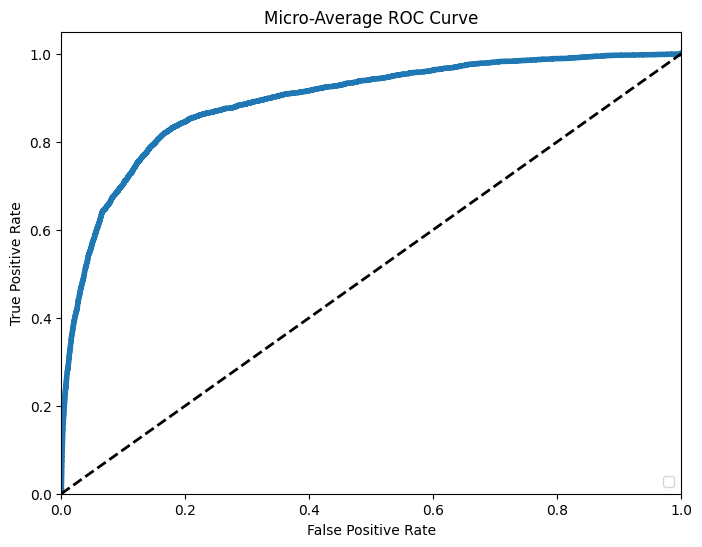

In [205]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_binary_test.ravel(), y_pred.ravel())

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Average ROC Curve')
plt.legend(loc="lower right")
plt.show()


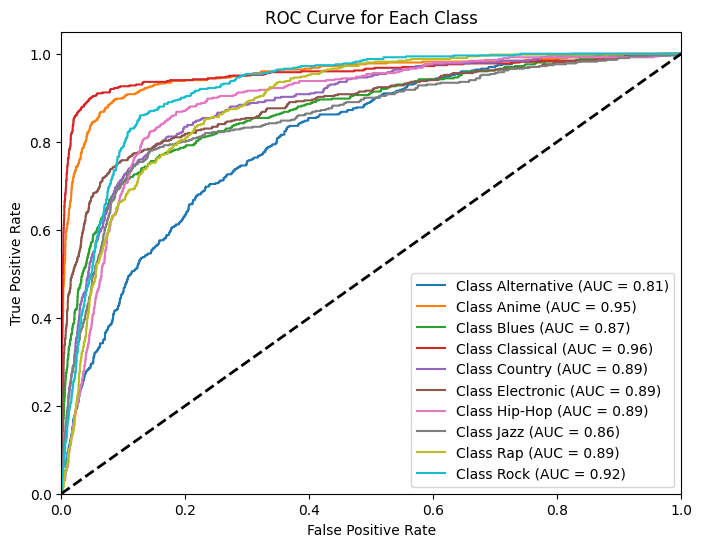

In [206]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_binary_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()


In [207]:
# AUC Scorer for multi-class classification
def multiclass_roc_auc_score(y_test, y_pred):
    
    y_test = label_binarize(y_test, classes=range(len(encoder.classes_)))
    y_pred = label_binarize(y_pred, classes=range(len(encoder.classes_)))

    return roc_auc_score(y_test, y_pred)

## decision Tree

cross validation

In [208]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Create a K-Fold cross-validation splitter
kf = KFold(n_splits=5, shuffle=True, random_state=14477830)

# Best score tracker
best_score = 0
best_params = {}

# Define Decision Tree parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Iterate over all combinations of parameters
for criterion in param_grid['criterion']:
    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                for max_features in param_grid['max_features']:
                    # Initialize the Decision Tree Classifier with current parameters
                    model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,
                                                   min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                                   max_features=max_features, random_state=14477830)

                    # Calculate cross-validated AUC scores
                    scores = cross_val_score(model,x_val_pca, y_val_encoded, cv=kf, scoring=make_scorer(multiclass_roc_auc_score))

                    # Compute the average AUC score
                    ave_score = scores.mean()

                    # Output the performance of the current parameter set
                    print(f"Params: criterion={criterion}, depth={max_depth}, split={min_samples_split}, leaf={min_samples_leaf}, features={max_features}")
                    print(f"Average AUC Score: {ave_score}")
                    print("---")

                    # Update best score and parameters if current score is better
                    if ave_score > best_score:
                        best_score = ave_score
                        best_params = {
                            'criterion': criterion,
                            'max_depth': max_depth,
                            'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf,
                            'max_features': max_features
                        }

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Average AUC Score:", best_score)

Params: criterion=gini, depth=10, split=2, leaf=1, features=sqrt
Average AUC Score: 0.66138353257269
---
Params: criterion=gini, depth=10, split=2, leaf=1, features=log2
Average AUC Score: 0.66138353257269
---
Params: criterion=gini, depth=10, split=2, leaf=2, features=sqrt
Average AUC Score: 0.6593584660764826
---
Params: criterion=gini, depth=10, split=2, leaf=2, features=log2
Average AUC Score: 0.6593584660764826
---
Params: criterion=gini, depth=10, split=5, leaf=1, features=sqrt
Average AUC Score: 0.6581672333525328
---
Params: criterion=gini, depth=10, split=5, leaf=1, features=log2
Average AUC Score: 0.6581672333525328
---
Params: criterion=gini, depth=10, split=5, leaf=2, features=sqrt
Average AUC Score: 0.6522741427584615
---
Params: criterion=gini, depth=10, split=5, leaf=2, features=log2
Average AUC Score: 0.6522741427584615
---
Params: criterion=gini, depth=20, split=2, leaf=1, features=sqrt
Average AUC Score: 0.6423067575529878
---
Params: criterion=gini, depth=20, split=2

modeling

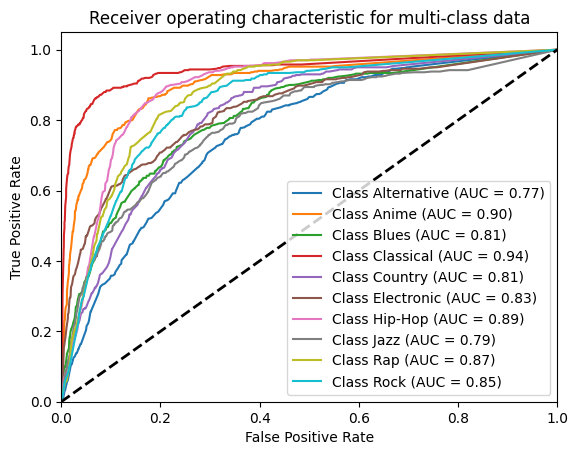

Overall AUC (Macro Average): 0.8479488


In [209]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Initialize the Decision Tree Classifier with the best parameters
model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=2,
                               min_samples_leaf=1, max_features='sqrt', random_state=14477830)

# Train the model on the training data
model.fit(x_train_pca, y_train_encoded)

# Predict probabilities for the test set
y_probs = model.predict_proba(x_test_pca)

# Calculate AUC score and plot ROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_binary_test[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
for i in range(len(encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

# Calculate overall AUC score using macro average
overall_auc_tree = roc_auc_score(y_binary_test, y_probs)
print("Overall AUC (Macro Average):", overall_auc_tree)


In [210]:
# Initialize a new array with the same shape as y_pred_proba, filled with zeros
y_pred_binary = np.zeros_like(y_probs)

# Set the maximum probability index to 1 for each sample
for i, probabilities in enumerate(y_probs):
    max_index = np.argmax(probabilities)  # Find the index with the highest probability
    y_pred_binary[i, max_index] = 1

# Initialize the count of correct predictions
correct_predictions = 0

# Iterate over each predicted and actual label
for predicted, actual in zip(y_pred_binary, y_binary_test):
    if (predicted == actual).all():  # This checks if all elements of the predicted array match the actual array
        correct_predictions += 1

# Calculate the accuracy
total_predictions = len(y_test)
manual_accuracy_dct = correct_predictions / total_predictions

print(f"Manually Calculated Accuracy: {manual_accuracy_dct:.4f}")

Manually Calculated Accuracy: 0.4484


## Random Forest 

cross validation

In [211]:
from sklearn.ensemble import RandomForestClassifier

# Create a K-Fold cross-validation splitter
kf = KFold(n_splits=5, shuffle=True, random_state=14477830)

# Best score tracker
best_score = 0
best_params = {}

# Define Random Forest parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Iterate over all combinations of parameters
for n_estimators in param_grid['n_estimators']:
    for criterion in param_grid['criterion']:
        for max_depth in param_grid['max_depth']:
            for min_samples_split in param_grid['min_samples_split']:
                for min_samples_leaf in param_grid['min_samples_leaf']:
                    for max_features in param_grid['max_features']:
                        # Initialize the Random Forest Classifier with current parameters
                        model = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion,
                                                       max_depth=max_depth, min_samples_split=min_samples_split,
                                                       min_samples_leaf=min_samples_leaf, max_features=max_features,
                                                       random_state=14477830)

                        # Calculate cross-validated AUC scores
                        scores = cross_val_score(model, x_val_pca, y_val_encoded, cv=kf, scoring=make_scorer(multiclass_roc_auc_score))

                        # Compute the average AUC score
                        ave_score = scores.mean()

                        # Output the performance of the current parameter set
                        print(f"Params: n_estimators={n_estimators}, criterion={criterion}, depth={max_depth}, split={min_samples_split}, leaf={min_samples_leaf}, features={max_features}")
                        print(f"Average AUC Score: {ave_score}")
                        print("---")

                        # Update best score and parameters if current score is better
                        if ave_score > best_score:
                            best_score = ave_score
                            best_params = {
                                'n_estimators': n_estimators,
                                'criterion': criterion,
                                'max_depth': max_depth,
                                'min_samples_split': min_samples_split,
                                'min_samples_leaf': min_samples_leaf,
                                'max_features': max_features
                            }

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Average AUC Score:", best_score)


Params: n_estimators=100, criterion=gini, depth=10, split=2, leaf=1, features=sqrt
Average AUC Score: 0.725274026841258
---
Params: n_estimators=100, criterion=gini, depth=10, split=2, leaf=1, features=log2
Average AUC Score: 0.725274026841258
---
Params: n_estimators=100, criterion=gini, depth=10, split=2, leaf=2, features=sqrt
Average AUC Score: 0.7266106541280022
---
Params: n_estimators=100, criterion=gini, depth=10, split=2, leaf=2, features=log2
Average AUC Score: 0.7266106541280022
---
Params: n_estimators=100, criterion=gini, depth=10, split=5, leaf=1, features=sqrt
Average AUC Score: 0.7222420114766144
---
Params: n_estimators=100, criterion=gini, depth=10, split=5, leaf=1, features=log2
Average AUC Score: 0.7222420114766144
---
Params: n_estimators=100, criterion=gini, depth=10, split=5, leaf=2, features=sqrt
Average AUC Score: 0.7253276091473705
---
Params: n_estimators=100, criterion=gini, depth=10, split=5, leaf=2, features=log2
Average AUC Score: 0.7253276091473705
---
Pa

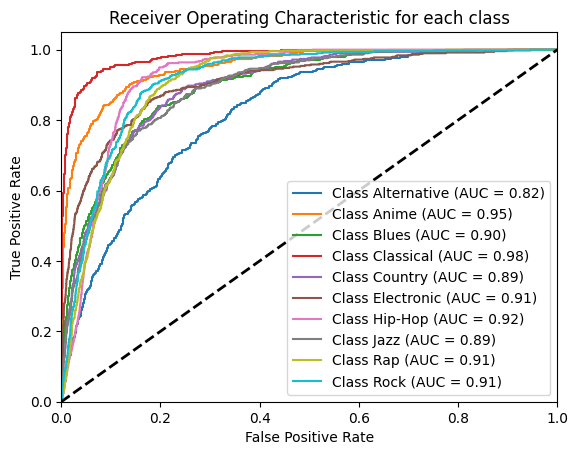

Overall AUC (Macro Average): 0.9076964444444444


In [212]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming best_params contains the optimal parameters found from your tuning
best_params = {
    'n_estimators': 200,
    'criterion': 'entropy',
    'max_depth': 10,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 'sqrt'
} 

# Initialize the RandomForestClassifier with the best parameters
model = RandomForestClassifier(**best_params, random_state=14477830)

# Train the model on the training data
model.fit(x_train_pca, y_train_encoded)

# Predict probabilities for the test data
y_probs = model.predict_proba(x_test_pca)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_binary_test[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
for i in range(len(encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

# Calculate overall AUC score using macro average
overall_auc_randf = roc_auc_score(y_binary_test, y_probs, multi_class='ovr', average='macro')
print("Overall AUC (Macro Average):", overall_auc_randf)

In [213]:
y_pred_binary = np.zeros_like(y_probs)

# Set the maximum probability index to 1 for each sample
for i, probabilities in enumerate(y_probs):
    max_index = np.argmax(probabilities)  # Find the index with the highest probability
    y_pred_binary[i, max_index] = 1

# Initialize the count of correct predictions
correct_predictions = 0

# Iterate over each predicted and actual label
for predicted, actual in zip(y_pred_binary, y_binary_test):
    if (predicted == actual).all():  # This checks if all elements of the predicted array match the actual array
        correct_predictions += 1

# Calculate the accuracy
total_predictions = len(y_test)
manual_accuracy_rf = correct_predictions / total_predictions

print(f"Manually Calculated Accuracy: {manual_accuracy_rf:.4f}")

Manually Calculated Accuracy: 0.5240


## Adaboost

cross validation

In [214]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a K-Fold cross-validation splitter
kf = KFold(n_splits=5, shuffle=True, random_state=14477830)

# Best score tracker
best_score = 0
best_params = {}

# Define AdaBoost parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1]
}

# Iterate over all combinations of parameters
for n_estimators in param_grid['n_estimators']:
    for learning_rate in param_grid['learning_rate']:
        # Initialize the AdaBoost Classifier with current parameters
        model = AdaBoostClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            algorithm='SAMME',
            random_state=14477830
        )

        # Calculate cross-validated AUC scores
        scores = cross_val_score(model, x_val_pca, y_val_encoded, cv=kf, scoring=make_scorer(multiclass_roc_auc_score))

        # Compute the average AUC score
        ave_score = scores.mean()

        # Output the performance of the current parameter set
        print(f"Params: n_estimators={n_estimators}, learning_rate={learning_rate}")
        print(f"Average AUC Score: {ave_score}")
        print("---")

        # Update best score and parameters if current score is better
        if ave_score > best_score:
            best_score = ave_score
            best_params = {
                'n_estimators': n_estimators,
                'learning_rate': learning_rate
            }

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Average AUC Score:", best_score)

Params: n_estimators=50, learning_rate=0.01
Average AUC Score: 0.5481130212419746
---
Params: n_estimators=50, learning_rate=0.1
Average AUC Score: 0.5788918927478702
---
Params: n_estimators=100, learning_rate=0.01
Average AUC Score: 0.5485939609787254
---
Params: n_estimators=100, learning_rate=0.1
Average AUC Score: 0.6090334291465337
---
Best Parameters: {'n_estimators': 100, 'learning_rate': 0.1}
Best Average AUC Score: 0.6090334291465337


Modeling

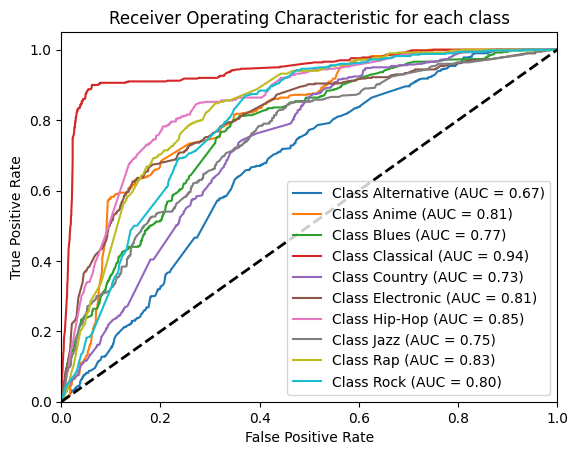

Overall AUC (Macro Average): 0.7949522222222223


In [215]:
# Assuming best_params contains the optimal parameters found from your tuning
best_params = {
    'n_estimators': 100,
    'learning_rate': 0.1
} 

# Initialize the RandomForestClassifier with the best parameters
model = AdaBoostClassifier(**best_params, algorithm='SAMME', random_state=14477830)

# Train the model on the training data
model.fit(x_train_pca, y_train_encoded)

# Predict probabilities for the test data
y_probs = model.predict_proba(x_test_pca)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_binary_test[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
for i in range(len(encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()

# Calculate overall AUC score using macro average
overall_auc_ada = roc_auc_score(y_binary_test, y_probs)
print("Overall AUC (Macro Average):", overall_auc_ada)

In [216]:
y_pred_binary = np.zeros_like(y_probs)

# Set the maximum probability index to 1 for each sample
for i, probabilities in enumerate(y_probs):
    max_index = np.argmax(probabilities)  # Find the index with the highest probability
    y_pred_binary[i, max_index] = 1

# Initialize the count of correct predictions
correct_predictions = 0

# Iterate over each predicted and actual label
for predicted, actual in zip(y_pred_binary, y_binary_test):
    if (predicted == actual).all():  # This checks if all elements of the predicted array match the actual array
        correct_predictions += 1

# Calculate the accuracy
total_predictions = len(y_test)
manual_accuracy_ada = correct_predictions / total_predictions

print(f"Manually Calculated Accuracy: {manual_accuracy_ada:.4f}")

Manually Calculated Accuracy: 0.3264


## FeedForward Network

In [217]:
# Create a dataframe with the principal components as predictors
df_principal_components = pd.DataFrame(x_train_pca, columns=['PC1', 'PC2', 'PC3', "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11"])

# Print the dataframe
print(df_principal_components)

            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      0.669533 -0.605265 -0.220764 -0.529105  0.196051  0.203199  0.525242   
1     -1.110178  1.351632  1.853842 -0.301846 -1.110211  0.070619 -1.346540   
2      1.090368  0.894102  0.000733  1.020643 -0.121088 -1.540503 -0.446934   
3     -0.838150  0.967828  0.422374 -0.748918  1.353249 -1.588123 -1.095823   
4     -0.703802 -0.152374 -1.300196 -0.393682  0.867852  1.175580  0.674000   
...         ...       ...       ...       ...       ...       ...       ...   
39995 -1.191641  2.793384  0.033067 -0.338850 -1.010691  0.516689 -0.014284   
39996 -2.022641 -1.312370  2.751974 -0.952359  0.749966  0.353886 -0.137795   
39997 -1.388192  0.230834 -0.357854  1.130842 -1.814013 -0.118844  0.569490   
39998  0.118355 -1.749174  1.305758  0.539445 -0.944148  0.213202  0.938496   
39999 -1.461812 -0.185352 -0.608722  0.747749  0.786856 -0.768748 -0.183838   

            PC8       PC9      PC10      PC11  
0  

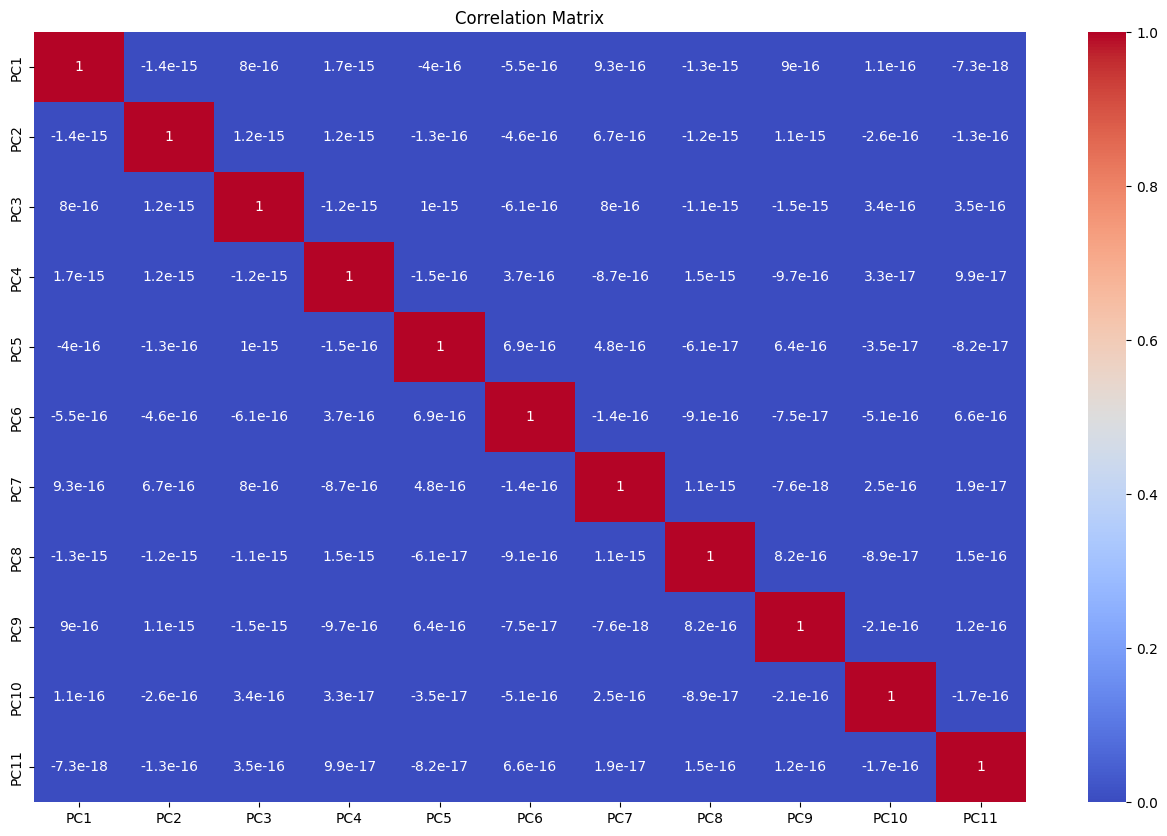

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df_principal_components.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Epoch 1/100


c:\Program Files\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 935us/step - accuracy: 0.4932 - loss: 1.3575 - val_accuracy: 0.5506 - val_loss: 1.1522
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.5617 - loss: 1.1415 - val_accuracy: 0.5616 - val_loss: 1.1107
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - accuracy: 0.5722 - loss: 1.0918 - val_accuracy: 0.5714 - val_loss: 1.0862
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.5807 - loss: 1.0659 - val_accuracy: 0.5754 - val_loss: 1.0757
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.5853 - loss: 1.0574 - val_accuracy: 0.5686 - val_loss: 1.0818
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - accuracy: 0.5901 - loss: 1.0447 - val_accuracy: 0.5836 - val_loss: 1.0759
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - accuracy: 0.5962 - loss: 1.0251 - val_accuracy: 0.5844 - val_loss: 1.0716
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step - accuracy: 0.5933 - los

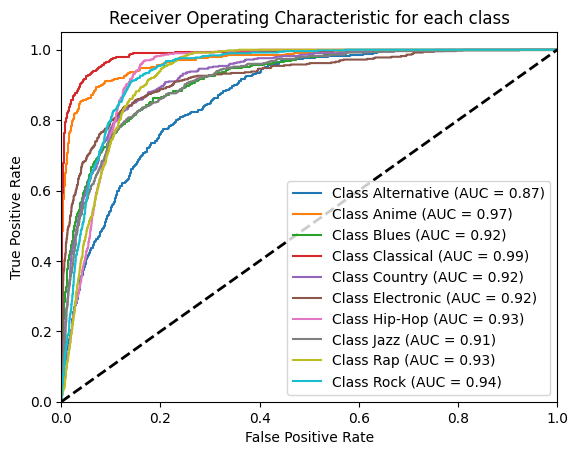

In [232]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve, auc
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Build the model
model1 = Sequential([
    Dense(256, activation='relu', input_shape=(x_train_pca.shape[1],)),
    #Dropout(0.2),  
    Dense(128, activation='relu'),
    #Dropout(0.2), 
    Dense(128, activation='relu'),
    #Dropout(0.2), 
    Dense(len(encoder.classes_), activation='softmax')
])

# Compile the model
model1.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# stop when 20 training has no improvement
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)

# Train the model
history = model1.fit(x_train_pca, y_train_encoded, epochs=100, batch_size=32, validation_data=(x_val_pca, y_val_encoded), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model1.evaluate(x_val_pca, y_val_encoded)
print("Test Accuracy:", test_acc)
print("Test Loss: ", test_loss)

# Predict probabilities for the test set
y_pred_prob = model1.predict(x_test_pca)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_binary_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
for i in range(len(encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()


In [233]:
import numpy as np

# Calculate the average value of roc_auc
average_roc_auc = np.mean(list(roc_auc.values()))

# Print the average value
print("Average ROC AUC:", average_roc_auc)


Average ROC AUC: 0.9294186666666666


In [234]:
y_pred_binary = np.zeros_like(y_pred_prob)

# Set the maximum probability index to 1 for each sample
for i, probabilities in enumerate(y_pred_prob):
    max_index = np.argmax(probabilities)  # Find the index with the highest probability
    y_pred_binary[i, max_index] = 1

# Initialize the count of correct predictions
correct_predictions = 0

# Iterate over each predicted and actual label
for predicted, actual in zip(y_pred_binary, y_binary_test):
    if (predicted == actual).all():  # This checks if all elements of the predicted array match the actual array
        correct_predictions += 1

# Calculate the accuracy
total_predictions = len(y_test)
manual_accuracy_fnn = correct_predictions / total_predictions

print(f"Manually Calculated Accuracy: {manual_accuracy_fnn:.4f}")

Manually Calculated Accuracy: 0.5914


Epoch 1/200


c:\Program Files\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 950us/step - accuracy: 0.4854 - loss: 1.3641 - val_accuracy: 0.5632 - val_loss: 1.1379 - learning_rate: 0.0010
Epoch 2/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - accuracy: 0.5605 - loss: 1.1385 - val_accuracy: 0.5634 - val_loss: 1.1050 - learning_rate: 0.0010
Epoch 3/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.5755 - loss: 1.0916 - val_accuracy: 0.5724 - val_loss: 1.0944 - learning_rate: 0.0010
Epoch 4/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - accuracy: 0.5819 - loss: 1.0691 - val_accuracy: 0.5712 - val_loss: 1.0853 - learning_rate: 0.0010
Epoch 5/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.5829 - loss: 1.0585 - val_accuracy: 0.5750 - val_loss: 1.0731 - learning_rate: 0.0010
Epoch 6/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - accuracy: 0.5865 - loss: 1.0464 - val_accuracy: 0.5742 - val_loss: 1.0764 - learning_rate: 0.0010
Epoch 7/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0

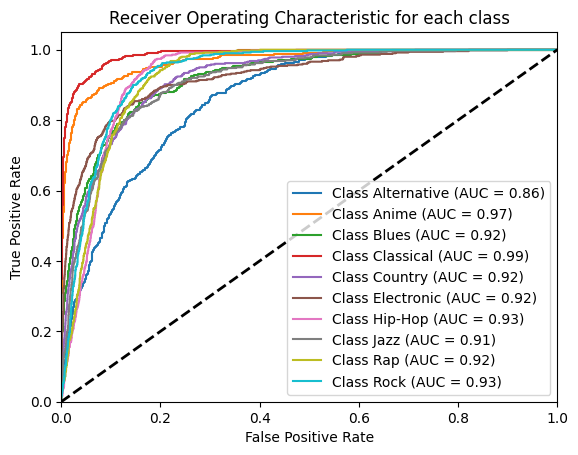

In [223]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve, auc
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Build the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(x_train_pca.shape[1],)),
    #Dropout(0.2),  
    Dense(128, activation='relu'),
    #Dropout(0.2), 
    Dense(128, activation='relu'),
    #Dropout(0.2), 
    Dense(len(encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# stop when 20 training has no improvement
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)

# Learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch > 50:
        return lr * 0.1
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# Train the model
history = model.fit(x_train_pca, y_train_encoded, epochs=200, batch_size=32, validation_data=(x_val_pca, y_val_encoded), callbacks=[early_stopping, lr_schedule])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_val_pca, y_val_encoded)
print("Test Accuracy:", test_acc)
print("Test Loss: ", test_loss)

# Predict probabilities for the test set
y_pred_prob = model.predict(x_test_pca)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_binary_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
for i in range(len(encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()


In [224]:
import numpy as np

# Calculate the average value of roc_auc
average_roc_auc = np.mean(list(roc_auc.values()))

# Print the average value
print("Average ROC AUC:", average_roc_auc)

Average ROC AUC: 0.9277352666666667


In [225]:
y_pred_binary = np.zeros_like(y_pred_prob)

# Set the maximum probability index to 1 for each sample
for i, probabilities in enumerate(y_pred_prob):
    max_index = np.argmax(probabilities)  # Find the index with the highest probability
    y_pred_binary[i, max_index] = 1

# Initialize the count of correct predictions
correct_predictions = 0

# Iterate over each predicted and actual label
for predicted, actual in zip(y_pred_binary, y_binary_test):
    if (predicted == actual).all():  # This checks if all elements of the predicted array match the actual array
        correct_predictions += 1

# Calculate the accuracy
total_predictions = len(y_test)
manual_accuracy_fnn = correct_predictions / total_predictions

print(f"Manually Calculated Accuracy: {manual_accuracy_fnn:.4f}")

Manually Calculated Accuracy: 0.5788


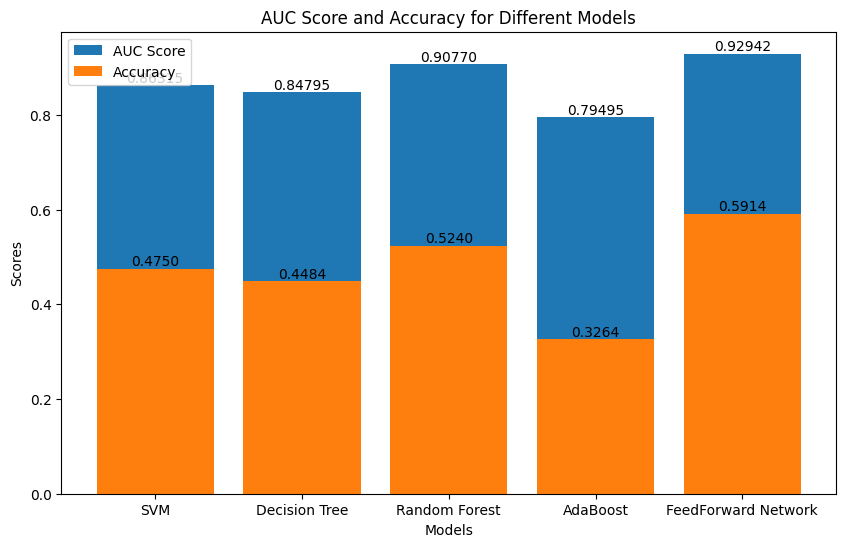

In [236]:
# Define the models, their corresponding AUC scores, and accuracy scores
models = ['SVM', 'Decision Tree', 'Random Forest', 'AdaBoost', 'FeedForward Network']
auc_scores = [0.8631515333333333, overall_auc_tree, overall_auc_randf, overall_auc_ada, average_roc_auc]
accuracy_scores = [0.4750, manual_accuracy_dct, manual_accuracy_rf, manual_accuracy_ada, manual_accuracy_fnn]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, auc_scores, label='AUC Score')
plt.bar(models, accuracy_scores, label='Accuracy')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('AUC Score and Accuracy for Different Models')
for i, score in enumerate(auc_scores):
    plt.text(i, score, f'{score:.5f}', ha='center', va='bottom')
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, f'{score:.4f}', ha='center', va='bottom')
plt.legend()
plt.show()


## Prediction using new labels

In [237]:
# Fit K-means using the optimal number of clusters
kmeans = KMeans(n_clusters=2, random_state=14477830)
kmeans.fit(x_train_pca)  # Fitting to training data

# Get new cluster labels for all datasets
y_train_new = kmeans.predict(x_train_pca)
y_test_new = kmeans.predict(x_test_pca)
y_val_new = kmeans.predict(x_val_pca)

In [238]:
def build_binary_model(input_shape):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_shape,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')  # Single output node for binary classification
    ])
    return model

# Build the model
model = build_binary_model(x_train_pca.shape[1])

# Compile the model with binary crossentropy loss and accuracy metric
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train_pca, y_train_new,
    epochs=100,
    batch_size=32,
    validation_data=(x_val_pca, y_val_new),
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_pca, y_test_new)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

Epoch 1/100


c:\Program Files\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 901us/step - accuracy: 0.9810 - loss: 0.0608 - val_accuracy: 0.9926 - val_loss: 0.0173
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step - accuracy: 0.9932 - loss: 0.0168 - val_accuracy: 0.9946 - val_loss: 0.0124
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - accuracy: 0.9952 - loss: 0.0125 - val_accuracy: 0.9970 - val_loss: 0.0084
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - accuracy: 0.9951 - loss: 0.0114 - val_accuracy: 0.9960 - val_loss: 0.0087
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.9964 - loss: 0.0092 - val_accuracy: 0.9944 - val_loss: 0.0151
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 818us/step - accuracy: 0.9965 - loss: 0.0099 - val_accuracy: 0.9944 - val_loss: 0.0228
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - accuracy: 0.9970 - loss: 0.0088 - val_accuracy: 0.9976 - val_loss: 0.0060
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - accuracy: 0.9974 - los

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step


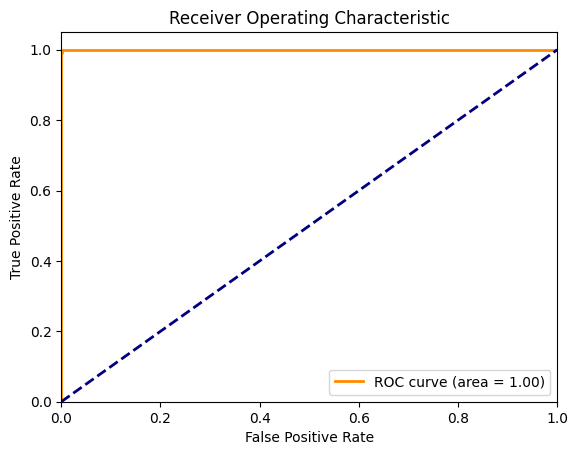

In [239]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
y_pred_prob = model.predict(x_test_pca).ravel()  # Use ravel() to flatten the output probabilities into 1D

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test_new, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Try TSNE to get different number clusters

In [248]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Apply t-SNE with 3 components for 3D visualization
tsne = TSNE(n_components=3, perplexity=20, random_state=14477830)
x_train_tsne = tsne.fit_transform(x_train_pca)

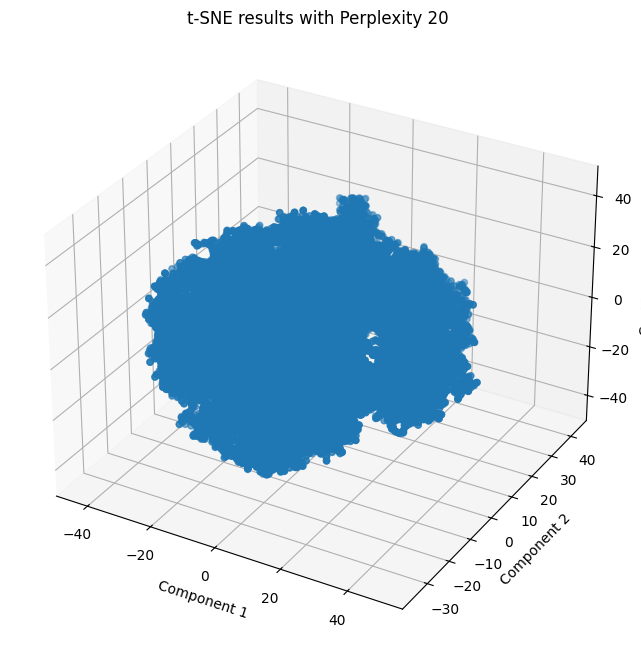

In [250]:
# Plot the 2D embedding for Perplexity 20
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], x_train_tsne[:, 2])
ax.set_title('t-SNE results with Perplexity 20')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()



In [251]:
scores = []
cluster_range = range(2, 15)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=14477830)
    labels = kmeans.fit_predict(x_train_tsne)
    score = silhouette_score(x_train_tsne, labels)
    scores.append(score)

# Determine the optimal number of clusters
optimal_clusters = cluster_range[np.argmax(scores)]
print("Optimal number of clusters:", optimal_clusters)

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=14477830)
clusters = kmeans.fit_predict(x_train_tsne)

Optimal number of clusters: 7


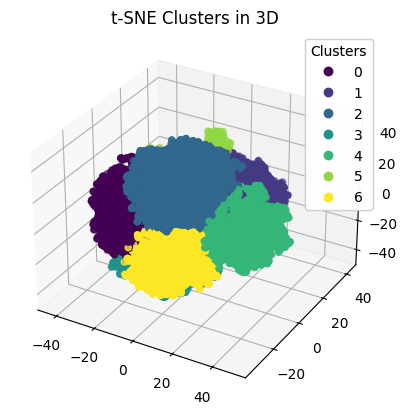

In [252]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], x_train_tsne[:, 2], c=clusters, cmap='viridis', label=clusters)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)
ax.set_title('t-SNE Clusters in 3D')
plt.show()

In [254]:
x_test_tsne = tsne.fit_transform(x_test_pca)
x_val_tsne = tsne.fit_transform(x_val_pca)

y_train_sne_new = kmeans.predict(x_train_tsne)
y_test_sne_new = kmeans.predict(x_test_tsne)
y_val_sne_new = kmeans.predict(x_val_tsne)

Epoch 1/100


c:\Program Files\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.9367 - loss: 0.1693 - val_accuracy: 0.9560 - val_loss: 0.1153
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - accuracy: 0.9717 - loss: 0.0691 - val_accuracy: 0.9616 - val_loss: 0.0931
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - accuracy: 0.9763 - loss: 0.0645 - val_accuracy: 0.9678 - val_loss: 0.0788
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - accuracy: 0.9788 - loss: 0.0552 - val_accuracy: 0.9694 - val_loss: 0.0926
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - accuracy: 0.9792 - loss: 0.0534 - val_accuracy: 0.9702 - val_loss: 0.0794
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.9802 - loss: 0.0486 - val_accuracy: 0.9758 - val_loss: 0.0624
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - accuracy: 0.9835 - loss: 0.0407 - val_accuracy: 0.9798 - val_loss: 0.0518
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - accuracy: 0.9840 - los

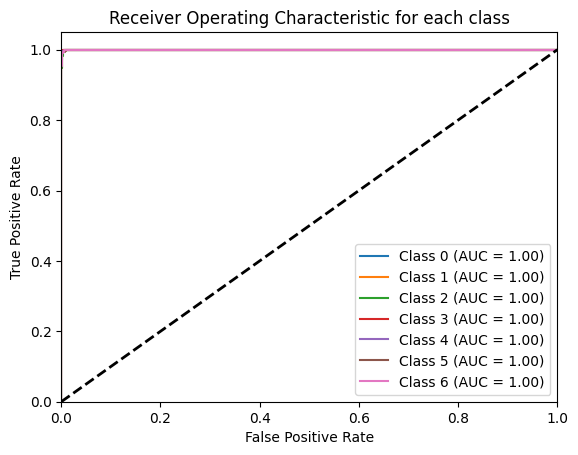

In [263]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve, auc
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Build the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(3,)),
    #Dropout(0.2),  
    Dense(128, activation='relu'),
    #Dropout(0.2), 
    Dense(128, activation='relu'),
    #Dropout(0.2), 
    Dense(len(encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# stop when 20 training has no improvement
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)

# Train the model
history = model.fit(x_train_tsne, y_train_sne_new, epochs=100, batch_size=32, validation_data=(x_val_tsne, y_val_sne_new), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_tsne, y_test_sne_new)
print("Test Accuracy:", test_acc)
print("Test Loss: ", test_loss)

# Predict probabilities for the test set
y_pred_prob = model.predict(x_test_tsne)

y_binary_test_sne = label_binarize(y_test_sne_new, classes=range(optimal_clusters)) 

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_binary_test_sne[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
for i in range(7):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()
